## Set up

In [85]:
import os
import matplotlib.pyplot as plt
import matplotlib as mpl
import contextily as ctx
import descartes as dsc
import pandas as pd
import geopandas as gp
from shapely.geometry import Point
from bokeh.models import ColumnDataSource, HoverTool, BoxZoomTool, ResetTool, SingleIntervalTicker,\
    Slider, Button, Label, CategoricalColorMapper, Legend, Circle, CheckboxButtonGroup, Select, NumeralTickFormatter

## Reading Geopandas data

In [47]:
dr = os.getcwd()
fdr = 'Neighbourhood boundaries'
in_f = 'neighbourhoods.geojson'

target = os.path.join(dr, fdr, in_f)

df = gp.read_file(target)

In [48]:
df

,neighbourhood,neighbourhood_group,geometry
0,Bayswater,Queens,"MULTIPOLYGON (((-73.76671 40.61491, -73.76825 ..."
1,Allerton,Bronx,"MULTIPOLYGON (((-73.84860 40.87167, -73.84582 ..."
2,City Island,Bronx,"MULTIPOLYGON (((-73.78282 40.84392, -73.78257 ..."
3,Ditmars Steinway,Queens,"MULTIPOLYGON (((-73.90160 40.76777, -73.90391 ..."
4,Ozone Park,Queens,"MULTIPOLYGON (((-73.83754 40.69136, -73.83108 ..."
...,...,...,...
228,Westchester Square,Bronx,"MULTIPOLYGON (((-73.84294 40.84640, -73.83913 ..."
229,Westerleigh,Staten Island,"MULTIPOLYGON (((-74.13131 40.62633, -74.13192 ..."
230,Williamsbridge,Bronx,"MULTIPOLYGON (((-73.86722 40.86969, -73.86701 ..."
231,Williamsburg,Brooklyn,"MULTIPOLYGON (((-73.95757 40.72510, -73.95300 ..."


In [49]:
df.head(1).T

,0
neighbourhood,Bayswater
neighbourhood_group,Queens
geometry,"(POLYGON ((-73.76670799999999 40.614911, -73.7..."


## Checking coordinate ref system

In [50]:
df.crs

{'init': 'epsg:4326'}

In [51]:
# encode the data so as they map onto the Web Mercator scale

df = df.to_crs(epsg=3857)

In [52]:
# data preview

df.head(1).T

,0
neighbourhood,Bayswater
neighbourhood_group,Queens
geometry,(POLYGON ((-8211672.372056099 4955705.98588607...


## Filters for Manhattan

In [53]:
df1 = df[df.neighbourhood_group == 'Manhattan']
df1

,neighbourhood,neighbourhood_group,geometry
18,Battery Park City,Manhattan,"MULTIPOLYGON (((-8239173.407 4970202.287, -823..."
43,Chinatown,Manhattan,"MULTIPOLYGON (((-8237641.317 4970831.912, -823..."
52,Chelsea,Manhattan,"MULTIPOLYGON (((-8236914.735 4975858.173, -823..."
53,Civic Center,Manhattan,"MULTIPOLYGON (((-8237419.012 4970060.124, -823..."
80,East Harlem,Manhattan,"MULTIPOLYGON (((-8230276.308 4985757.389, -823..."
87,East Village,Manhattan,"MULTIPOLYGON (((-8236607.493 4973300.426, -823..."
94,Financial District,Manhattan,"MULTIPOLYGON (((-8239173.407 4970202.287, -823..."
96,Flatiron District,Manhattan,"MULTIPOLYGON (((-8235792.300 4974269.053, -823..."
107,Gramercy,Manhattan,"MULTIPOLYGON (((-8235251.955 4973604.975, -823..."
117,Greenwich Village,Manhattan,"MULTIPOLYGON (((-8236691.650 4972853.241, -823..."


In [55]:
df2 = pd.read_csv("listings.csv")

In [78]:
entire = df2[df2.room_type == 'Entire home/apt']
man = entire[entire.neighbourhood_group == 'Manhattan']
man1 = man[man.availability_365 > 100]
man1

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
7,5222,Best Hideaway,7516,Marilyn,Manhattan,East Village,40.72764,-73.97949,Entire home/apt,116,30,94,2016-06-15,0.73,1,347
18,7750,Huge 2 BR Upper East Cental Park,17985,Sing,Manhattan,East Harlem,40.79685,-73.94872,Entire home/apt,190,7,0,NaN,NaN,2,302
25,9357,Midtown Pied-a-terre,30193,Tommi,Manhattan,Hell's Kitchen,40.76715,-73.98533,Entire home/apt,150,10,58,2017-08-13,0.48,1,142
41,12343,BEST BET IN HARLEM,47727,Earl,Manhattan,Harlem,40.81175,-73.94478,Entire home/apt,150,7,100,2019-07-31,0.85,1,317
48,14287,Cozy 1BD on Central Park West in New York City,56094,Joya,Manhattan,Upper West Side,40.78635,-73.97008,Entire home/apt,151,3,80,2019-09-09,0.68,1,109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48349,38551538,Modern Studio APT in the heart of K-TOWN,137669844,Yeonjoo,Manhattan,Midtown,40.74686,-73.98701,Entire home/apt,170,3,0,NaN,NaN,1,112
48354,38553206,Entire Studio in Downtown Manhattan,275978809,Longfeng,Manhattan,Chinatown,40.71398,-73.99583,Entire home/apt,160,1,0,NaN,NaN,1,356
48357,38553463,(3A) Bright 2 bed in luxury amenity building,278925199,Saul,Manhattan,Upper East Side,40.76094,-73.96148,Entire home/apt,220,30,0,NaN,NaN,10,263
48366,38557280,"convenient location in nyc entire apt,near subway",112452087,Hannah,Manhattan,East Harlem,40.79788,-73.93743,Entire home/apt,400,1,0,NaN,NaN,3,327


In [79]:
nh = pd.DataFrame(man1.groupby('neighbourhood')['price'].aggregate(np.mean))
nh

,price
neighbourhood,
Battery Park City,850.055556
Chelsea,333.712838
Chinatown,308.450000
Civic Center,200.400000
East Harlem,204.918660
East Village,259.864780
Financial District,274.015837
Flatiron District,530.695652
Gramercy,404.487805


In [81]:
df_price = pd.merge(df1, nh, on='neighbourhood')
df_price.set_index('price')

,neighbourhood,neighbourhood_group,geometry,rep
price,,,,
850.055556,Battery Park City,Manhattan,"MULTIPOLYGON (((-8239173.407 4970202.287, -823...",POINT (-8239478.687 4969665.002)
308.450000,Chinatown,Manhattan,"MULTIPOLYGON (((-8237641.317 4970831.912, -823...",POINT (-8237081.354 4970530.093)
333.712838,Chelsea,Manhattan,"MULTIPOLYGON (((-8236914.735 4975858.173, -823...",POINT (-8237628.329 4974971.819)
200.400000,Civic Center,Manhattan,"MULTIPOLYGON (((-8237419.012 4970060.124, -823...",POINT (-8237975.625 4970233.936)
204.918660,East Harlem,Manhattan,"MULTIPOLYGON (((-8230276.308 4985757.389, -823...",POINT (-8230690.536 4983159.033)
259.864780,East Village,Manhattan,"MULTIPOLYGON (((-8236607.493 4973300.426, -823...",POINT (-8235611.690 4972053.899)
274.015837,Financial District,Manhattan,"MULTIPOLYGON (((-8239173.407 4970202.287, -823...",POINT (-8238589.278 4969176.058)
530.695652,Flatiron District,Manhattan,"MULTIPOLYGON (((-8235792.300 4974269.053, -823...",POINT (-8236529.914 4974517.950)
404.487805,Gramercy,Manhattan,"MULTIPOLYGON (((-8235251.955 4973604.975, -823...",POINT (-8235986.148 4973486.711)


## Plotting data

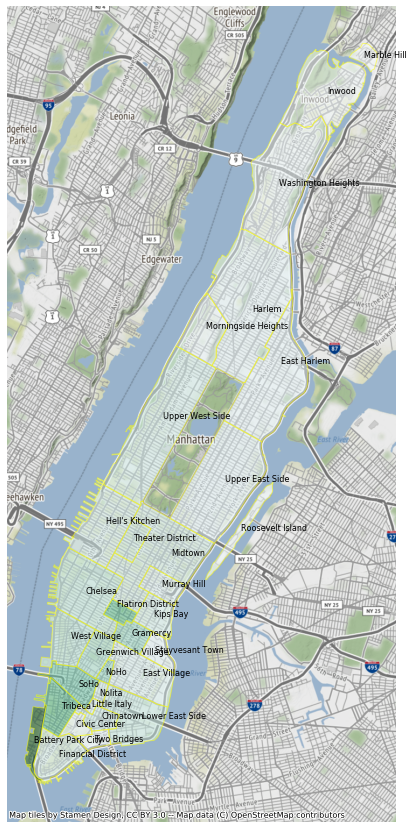

In [98]:
# plot the data
#df1["center"] = df1["geometry"].centroid
#df1_points = df1.copy()
#df1_points.set_geometry("center", inplace = True)


df_price["rep"] = df_price["geometry"].representative_point()
df_price_points = df_price.copy()
df_price_points.set_geometry("rep", inplace = True)

# cmap = mpl.cm.cool
# norm = mpl.colors.Normalize(vmin=100, vmax=900)

# cb1 = mpl.colorbar.ColorbarBase(ax, cmap=cmap,
#                                 norm=norm,
#                                 orientation='horizontal')
#cb1.set_label('Some Units')
#fig.show()

variable = 'price'

ax = df_price.plot(figsize=(10, 15), column=variable, alpha=0.5, edgecolor='yellow', cmap = 'BuGn')

#ax.add_tools(HoverTool(tooltips=TOOLTIPS, show_arrow=False, point_policy='follow_mouse'))

texts = []

for x, y, label in zip(df1_points.geometry.x, df1_points.geometry.y, df1_points["neighbourhood"]):
    texts.append(plt.text(x, y, label, fontsize = 8))
    

    
ax.set_axis_off()
ctx.add_basemap(ax)
